# Import necessary libraries 

In [16]:
# Import necessary libraries
import sqlite3
import datetime 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import garmindb

# Check SSO login credentials in config file 

In [2]:
# Ensure your config file is correct and loaded

# Remove this before uploading to github
!cat ~/.GarminDb/GarminConnectConfig.json

{
    "db": {
        "type"                          : "sqlite"
    },
    "garmin": {
        "domain"                        : "garmin.com"
    },
    "credentials": {
        "user"                          : "hongjing123321@gmail.com",
        "secure_password"               : false,
        "password"                      : "Password004!"
    },
    "data": {
        "weight_start_date"             : "12/31/2019",
        "sleep_start_date"              : "12/31/2019",
        "rhr_start_date"                : "12/31/2019",
        "monitoring_start_date"         : "12/31/2019",
        "download_latest_activities"    : 25,
        "download_all_activities"       : 1000
    },
    "directories": {
        "relative_to_home"              : true,
        "base_dir"                      : "HealthData",
        "mount_dir"                     : "/Volumes/GARMIN"
    },
    "enabled_stats": {
        "monitoring"                    : true,
        "steps"                         : tru

# Check garmindb object

In [15]:
help(garmindb)

Help on package garmindb:

NAME
    garmindb - A database and database objects for storing health data from Garmin Connect.

PACKAGE CONTENTS
    activities_fit_data
    activity_fit_file_processor
    activity_fit_plugin_base
    analyze
    checkup
    copy
    download
    export_activities
    fit_data
    fit_file_processor
    fitbitdb (package)
    garmin_connect_config_manager
    garmin_connect_enums
    garmin_json_data
    garmin_tcx_data
    garmindb (package)
    import_monitoring
    monitoring_fit_file_processor
    monitoring_fit_plugin_base
    mshealthdb (package)
    open_with_basecamp
    open_with_google_earth
    plugin_base
    plugin_manager
    sleep_fit_file_processor
    statistics
    summarydb (package)
    tcx
    version
    version_info

DATA
    __copyright__ = 'Copyright Tom Goetz'
    __license__ = 'GPL'

VERSION
    3.6.0

AUTHOR
    Tom Goetz

FILE
    /Users/hongjingtoh/Documents/Projects/garmin-data-analysis/env/lib/python3.12/site-packages/garmin

# Helper function that lists tables in each database 

In [3]:
def list_tables(db_connection):
    cursor = db_connection.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    cursor.close()
    return [table[0] for table in tables]

# Connect to databases
garmin_summary = sqlite3.connect('/Users/hongjingtoh/HealthData/DBs/garmin_summary.db')
garmin = sqlite3.connect('/Users/hongjingtoh/HealthData/DBs/garmin.db')
summary = sqlite3.connect('/Users/hongjingtoh/HealthData/DBs/summary.db')
activities = sqlite3.connect('/Users/hongjingtoh/HealthData/DBs/activities.db') 
monitoring = sqlite3.connect('/Users/hongjingtoh/HealthData/DBs/monitoring.db')

# Print list of tables in each database
print("Garmin Summary Tables:", list_tables(garmin_summary))
print("Garmin Tables:", list_tables(garmin))
print("Summary Tables:", list_tables(summary))
print("Activities Tables:", list_tables(activities))
print("Monitoring Tables:", list_tables(monitoring))


Garmin Summary Tables: ['_attributes', 'summary', 'years_summary', 'months_summary', 'weeks_summary', 'days_summary', 'intensity_hr']
Garmin Tables: ['_attributes', 'attributes', 'devices', 'weight', 'stress', 'sleep', 'sleep_events', 'resting_hr', 'daily_summary', 'files', 'device_info']
Summary Tables: ['_attributes', 'summary', 'years_summary', 'months_summary', 'weeks_summary', 'days_summary']
Activities Tables: []
Monitoring Tables: []


# Plotting

Plotting Average Daily Heart Rate Over Time

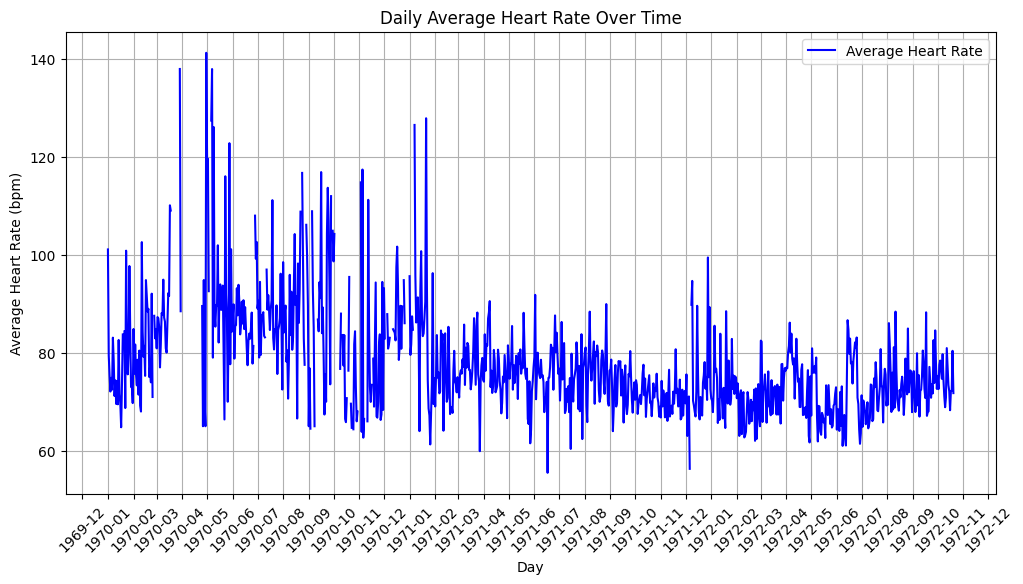

In [5]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_summary['day'], df_summary['hr_avg'], label='Average Heart Rate', color='blue')
plt.xlabel('Day')
plt.ylabel('Average Heart Rate (bpm)')
plt.title('Daily Average Heart Rate Over Time')


# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format dates as year-month

plt.xticks(rotation=45)  # rotate dates for better readability
plt.legend()
plt.grid(True)
plt.show()


Box Plot of Active vs. Inactive Heart Rate

In [6]:
# Check for NaN values and remove them if necessary
active_hr = df_summary['hr_avg'].dropna()
inactive_hr = df_summary['inactive_hr_avg'].dropna()


/var/folders/jr/q20sbc6s46j1qqfxm5f630bh0000gn/T/ipykernel_6643/2121426434.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([active_hr, inactive_hr], labels=['Active HR', 'Inactive HR'], notch=True, patch_artist=True)


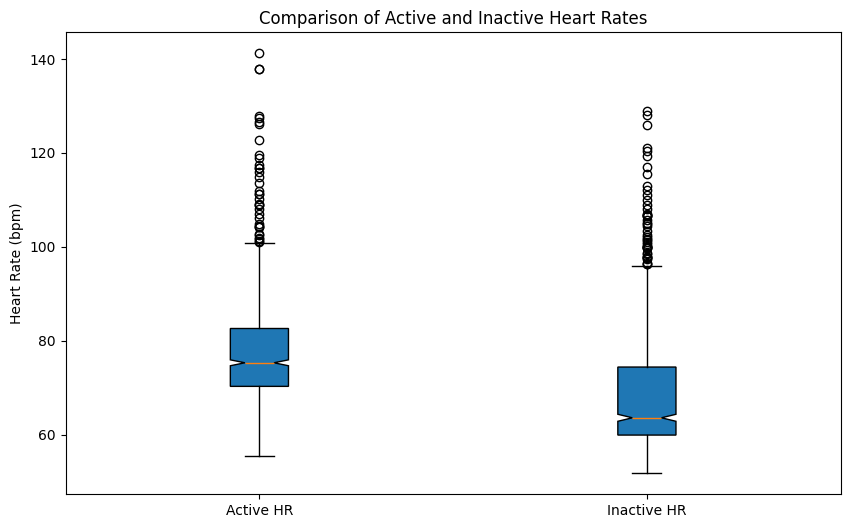

In [7]:
# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([active_hr, inactive_hr], labels=['Active HR', 'Inactive HR'], notch=True, patch_artist=True)
plt.title('Comparison of Active and Inactive Heart Rates')
plt.ylabel('Heart Rate (bpm)')
plt.show()

In [8]:
# Generate a box plot using Plotly
fig = go.Figure()

# Add box plot for active heart rate
fig.add_trace(go.Box(y=df_summary['hr_avg'].dropna(), name='Active HR',
                     marker_color='blue', boxpoints='all', jitter=0.3, pointpos=-1.8))

# Add box plot for inactive heart rate
fig.add_trace(go.Box(y=df_summary['inactive_hr_avg'].dropna(), name='Inactive HR',
                     marker_color='red', boxpoints='all', jitter=0.3, pointpos=-1.8))

# Update layout and titles
fig.update_layout(
    title='Comparison of Active and Inactive Heart Rates',
    yaxis_title='Heart Rate (bpm)',
    boxmode='group'  # group boxes of the different traces for easier comparison
)

# Show the plot
fig.show()

Histogram of daily maximum heart rate 

In [9]:
# Check for NaN values in the hr_max column
print(df_summary['hr_max'].isna().sum())

# Drop NaN values from the hr_max column for plotting
hr_max_clean = df_summary['hr_max'].dropna()

76


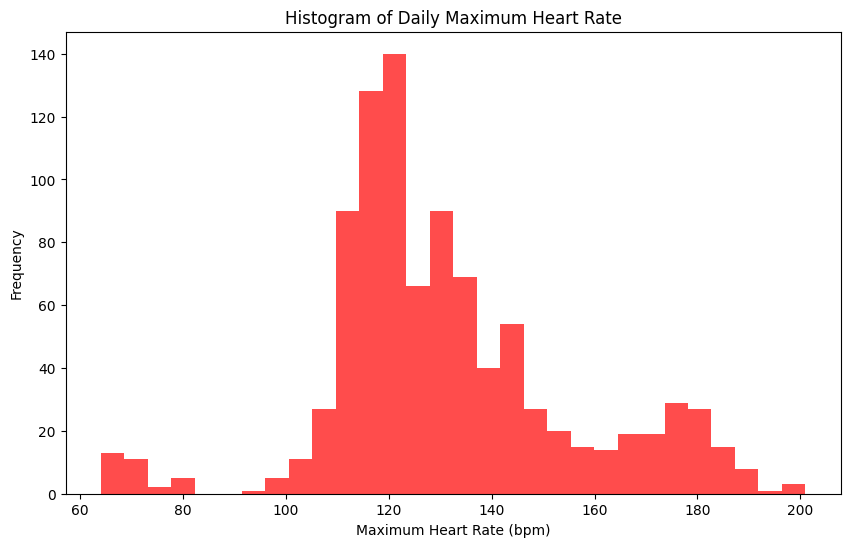

In [10]:
# Plot histogram of Daily Maximum Heart Rate
plt.figure(figsize=(10, 6))
plt.hist(hr_max_clean, bins=30, color='red', alpha=0.7)
plt.title('Histogram of Daily Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

Scatter Plot of Heart Rate vs. Respiration Rate

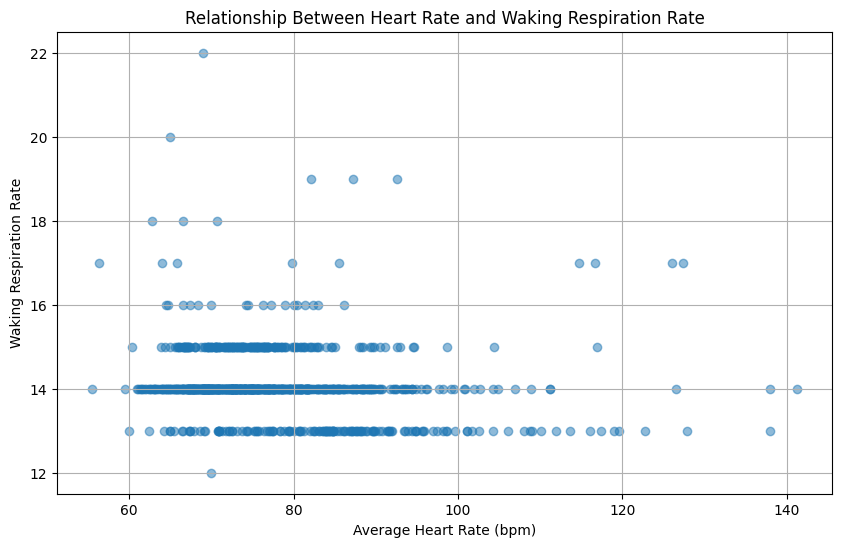

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_summary['hr_avg'], df_summary['rr_waking_avg'], alpha=0.5)
plt.xlabel('Average Heart Rate (bpm)')
plt.ylabel('Waking Respiration Rate')
plt.title('Relationship Between Heart Rate and Waking Respiration Rate')
plt.grid(True)
plt.show()


Correlation Heatmap of Physiological Metrics

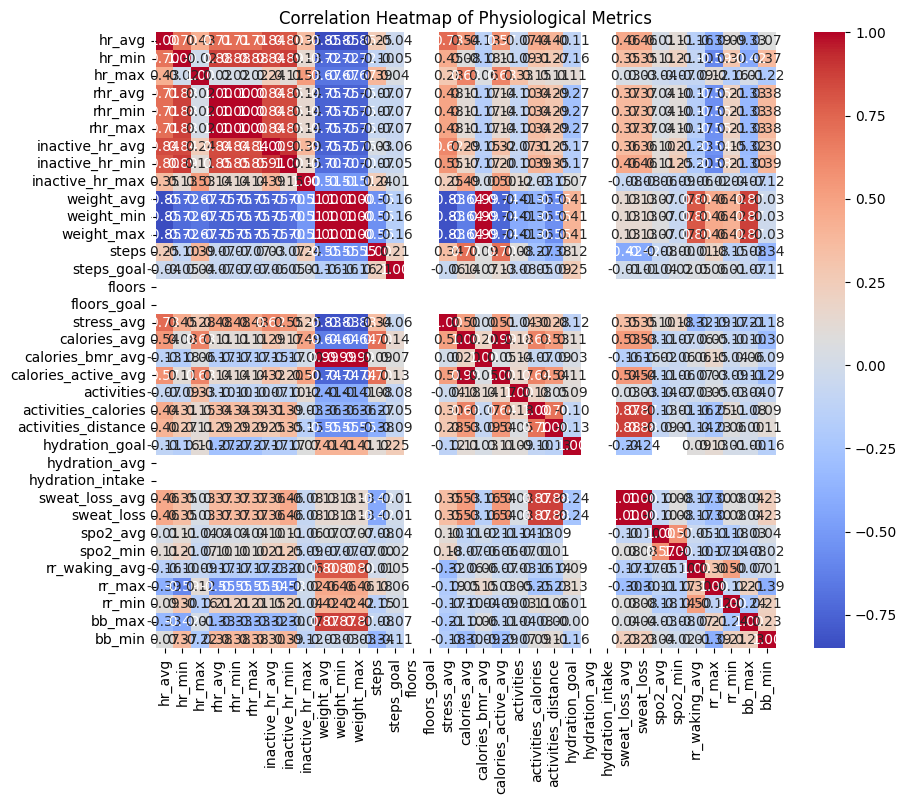

In [12]:
# Calculate correlations
corr = df_summary.select_dtypes(include=[np.number]).corr()  # Select numeric columns for correlation

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Physiological Metrics')
plt.show()

In [13]:
import garmindb 